# Classificação da Base de Dados IES

## Importação das Bibliotecas

In [1]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import tree

warnings.simplefilter('ignore')

-------------------------------

## Importação do Dataset

In [3]:
df = pd.read_csv('../../data/dataset_new_with_outliers.csv')
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,21685,1,1,161,0.400000,2,3,1.541367,1.570313,1.641055,0,0.000000,0,0.000000,3,0.00,0.000000
1,17289,1,1,1328,0.800000,3,3,2.702910,2.621254,2.589799,1,-0.333333,51,0.078431,1,243114.29,0.205394
2,977,0,1,248,0.153846,2,3,1.421430,1.472093,1.541100,0,0.000000,0,0.000000,0,0.00,0.000000
3,913,0,1,8796,0.466667,3,3,2.367000,2.305285,2.326510,1,-0.054737,475,0.000000,3,51862.06,0.000000
4,21399,1,1,460,0.176471,2,3,1.330864,1.369776,1.449247,0,0.000000,0,0.000000,0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,2362,1,0,5204,0.894737,5,3,2.410600,2.410600,2.800800,1,-0.145072,2516,0.387917,8,67946547.63,0.666314
2173,3596,1,0,823,0.800000,3,3,2.621100,2.621100,3.043900,0,0.000000,0,0.000000,0,0.00,0.000000
2174,1289,0,0,860,1.000000,4,4,2.438600,2.438600,2.438600,1,-0.004474,447,0.015660,1,25162.00,0.000000
2175,4008,0,0,1005,0.333333,3,3,1.693800,1.693800,1.693800,0,0.000000,0,0.000000,0,0.00,0.000000


---------------------------------------

## Formatação do Dataset

* Binarizando colunas:

In [4]:
df["% FIES"] = np.where(df["% FIES"] == 0, 0, 1)
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,21685,1,1,161,0.400000,2,3,1.541367,1.570313,1.641055,0,0.000000,0,0,3,0.00,0.000000
1,17289,1,1,1328,0.800000,3,3,2.702910,2.621254,2.589799,1,-0.333333,51,1,1,243114.29,0.205394
2,977,0,1,248,0.153846,2,3,1.421430,1.472093,1.541100,0,0.000000,0,0,0,0.00,0.000000
3,913,0,1,8796,0.466667,3,3,2.367000,2.305285,2.326510,1,-0.054737,475,0,3,51862.06,0.000000
4,21399,1,1,460,0.176471,2,3,1.330864,1.369776,1.449247,0,0.000000,0,0,0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,2362,1,0,5204,0.894737,5,3,2.410600,2.410600,2.800800,1,-0.145072,2516,1,8,67946547.63,0.666314
2173,3596,1,0,823,0.800000,3,3,2.621100,2.621100,3.043900,0,0.000000,0,0,0,0.00,0.000000
2174,1289,0,0,860,1.000000,4,4,2.438600,2.438600,2.438600,1,-0.004474,447,1,1,25162.00,0.000000
2175,4008,0,0,1005,0.333333,3,3,1.693800,1.693800,1.693800,0,0.000000,0,0,0,0.00,0.000000


* Aplicando normalização:

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df = df.drop(columns={'Codigo da IES'})
df[['DIAS', 'IGC_N', 'IGC_M', 
    'IGC_V', 'variacao mat', 'mat_T 2017',
    'CURSOS', 'saldo 2017', 'Variacao 17-16', 'CI N', 'CI V']] = scaler.fit_transform(df[['DIAS', 'IGC_N', 'IGC_M', 
                                                                          'IGC_V', 'variacao mat', 'mat_T 2017',
                                                                          'CURSOS', 'saldo 2017', 'Variacao 17-16', 'CI N', 'CI V']])

df

,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,1,1,0.004825,0.400000,0.25,0.50,0.304789,0.313594,0.998899,0,0.003016,0.000000,0,0.001603,0.830934,0.030305
1,1,1,0.044756,0.800000,0.50,0.50,0.538268,0.523926,0.999210,1,0.001966,0.000137,1,0.000534,0.830944,0.030305
2,0,1,0.007802,0.153846,0.25,0.50,0.280680,0.293936,0.998866,0,0.003016,0.000000,0,0.000000,0.830934,0.030305
3,0,1,0.300291,0.466667,0.50,0.50,0.470747,0.460688,0.999123,1,0.002844,0.001272,0,0.001603,0.830936,0.030305
4,1,1,0.015056,0.176471,0.25,0.50,0.262476,0.273459,0.998836,0,0.003016,0.000000,0,0.000000,0.830934,0.030305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,1,0,0.177382,0.894737,1.00,0.50,0.479511,0.481766,0.999279,1,0.002559,0.006740,1,0.004274,0.833808,0.030305
2173,1,0,0.027476,0.800000,0.50,0.50,0.521823,0.523895,0.999359,0,0.003016,0.000000,0,0.000000,0.830934,0.030305
2174,0,0,0.028743,1.000000,0.75,0.75,0.485139,0.487370,0.999160,1,0.003002,0.001197,1,0.000534,0.830935,0.030305
2175,0,0,0.033704,0.333333,0.50,0.50,0.335429,0.338308,0.998916,0,0.003016,0.000000,0,0.000000,0.830934,0.030305


* Removendo atributos:

In [6]:
df = df.drop(columns={'CI N', 'CI V'})
df

,Natureza,Situacao,DIAS,%,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,1,1,0.004825,0.400000,0.304789,0.313594,0.998899,0,0.003016,0.000000,0,0.001603,0.830934,0.030305
1,1,1,0.044756,0.800000,0.538268,0.523926,0.999210,1,0.001966,0.000137,1,0.000534,0.830944,0.030305
2,0,1,0.007802,0.153846,0.280680,0.293936,0.998866,0,0.003016,0.000000,0,0.000000,0.830934,0.030305
3,0,1,0.300291,0.466667,0.470747,0.460688,0.999123,1,0.002844,0.001272,0,0.001603,0.830936,0.030305
4,1,1,0.015056,0.176471,0.262476,0.273459,0.998836,0,0.003016,0.000000,0,0.000000,0.830934,0.030305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,1,0,0.177382,0.894737,0.479511,0.481766,0.999279,1,0.002559,0.006740,1,0.004274,0.833808,0.030305
2173,1,0,0.027476,0.800000,0.521823,0.523895,0.999359,0,0.003016,0.000000,0,0.000000,0.830934,0.030305
2174,0,0,0.028743,1.000000,0.485139,0.487370,0.999160,1,0.003002,0.001197,1,0.000534,0.830935,0.030305
2175,0,0,0.033704,0.333333,0.335429,0.338308,0.998916,0,0.003016,0.000000,0,0.000000,0.830934,0.030305


---------------------------

## Métodos de Classificação

### Classificação Por Situação:

* Naive Bayes:

In [9]:
df_bayes = shuffle(df)

x_nb_train = df_bayes[['Natureza', 'DIAS', '%','IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[:2000]
y_nb_train = pd.DataFrame({'Situacao':df_bayes['Situacao'].iloc[0:2000]})

x_nb_test = df_bayes[['Natureza', 'DIAS', '%', 'IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[2000:]
y_nb_test = pd.DataFrame({'Situacao':df_bayes['Situacao'].iloc[2000:]})

x_nb_train.shape[0], y_nb_train.shape[0], x_nb_test.shape[0], y_nb_test.shape[0]

(2000, 2000, 177, 177)

In [10]:
model_nb = GaussianNB()
model_nb.fit(x_nb_train, y_nb_train)

y_nb_predict = model_nb.predict(x_nb_test)

accuracy = accuracy_score(y_nb_test, y_nb_predict)
print("Acurácia: ", accuracy)

Acurácia:  0.615819209039548


* Árvore de Decisão:

In [11]:
df_tree = shuffle(df)

x_tree_train = df_tree[['Natureza', 'DIAS', '%', 'IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[:2000]
y_tree_train = pd.DataFrame({'Situacao':df_tree['Situacao'].iloc[0:2000]})

x_tree_test = df_tree[['Natureza', 'DIAS', '%', 'IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[2000:]
y_tree_test = pd.DataFrame({'Situacao':df_tree['Situacao'].iloc[2000:]})

x_tree_train.shape[0], y_tree_train.shape[0], x_tree_test.shape[0], y_tree_test.shape[0]

(2000, 2000, 177, 177)

In [42]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_tree_train, y_tree_train)

y_tree_predict = model_tree.predict(x_tree_test)

accuracy = accuracy_score(y_tree_test, y_tree_predict)
print("Acurácia: ", accuracy)

Acurácia:  0.9378531073446328


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.065\ngini = 0.203\nsamples = 2000\nvalue = [229, 1771]'),
 Text(0.25, 0.5, 'x[5] <= 0.999\ngini = 0.438\nsamples = 185\nvalue = [125, 60]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.06\nsamples = 65\nvalue = [63, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 120\nvalue = [62, 58]'),
 Text(0.75, 0.5, 'x[4] <= 0.985\ngini = 0.108\nsamples = 1815\nvalue = [104, 1711]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.092\nsamples = 1795\nvalue = [87, 1708]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]')]

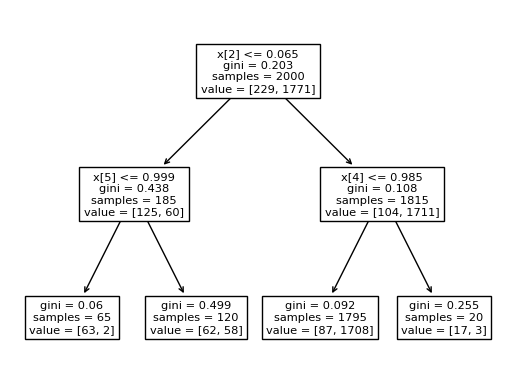

In [41]:
tree.plot_tree(model_tree)

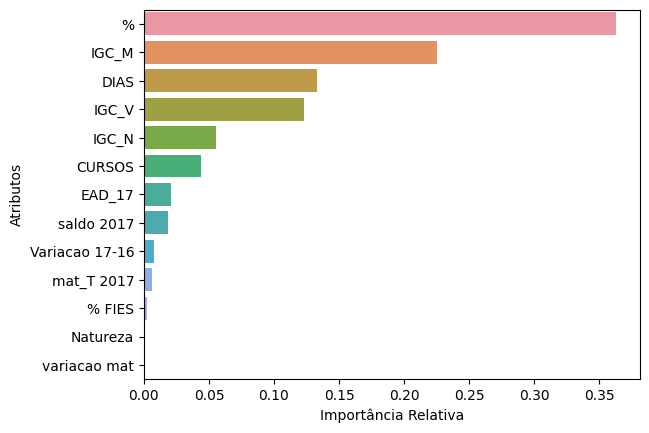

In [48]:
importancias_dos_atributos = pd.Series(model_tree.feature_importances_,index=['Natureza', 'DIAS', '%', 'IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']).sort_values(ascending=False)
importancias_dos_atributos

sns.barplot(x=importancias_dos_atributos, y=importancias_dos_atributos.index)

plt.xlabel('Importância Relativa')
plt.ylabel('Atributos')
#plt.legend()
plt.show()

### Classificação Por Natureza:

* Naive Bayes:

In [50]:
df_bayes = shuffle(df)

x_nb_train = df_bayes[['Situacao', 'DIAS', '%','IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[:2000]
y_nb_train = pd.DataFrame({'Natureza':df_bayes['Natureza'].iloc[0:2000]})

x_nb_test = df_bayes[['Situacao', 'DIAS', '%', 'IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[2000:]
y_nb_test = pd.DataFrame({'Natureza':df_bayes['Natureza'].iloc[2000:]})

x_nb_train.shape[0], y_nb_train.shape[0], x_nb_test.shape[0], y_nb_test.shape[0]

(2000, 2000, 177, 177)

In [51]:
model_nb = GaussianNB()
model_nb.fit(x_nb_train, y_nb_train)

y_nb_predict = model_nb.predict(x_nb_test)

accuracy = accuracy_score(y_nb_test, y_nb_predict)
print("Acurácia: ", accuracy)

Acurácia:  0.6271186440677966


* Decision Tree:

In [52]:
df_tree = shuffle(df)

x_tree_train = df_tree[['Situacao', 'DIAS', '%','IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[:2000]
y_tree_train = pd.DataFrame({'Natureza':df_tree['Natureza'].iloc[0:2000]})

x_tree_test = df_tree[['Situacao', 'DIAS', '%','IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']].iloc[2000:]
y_tree_test = pd.DataFrame({'Natureza':df_tree['Natureza'].iloc[2000:]})

x_tree_train.shape[0], y_tree_train.shape[0], x_tree_test.shape[0], y_tree_test.shape[0]

(2000, 2000, 177, 177)

In [53]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_tree_train, y_tree_train)

y_tree_predict = model_tree.predict(x_tree_test)

accuracy = accuracy_score(y_tree_test, y_tree_predict)
print("Acurácia: ", accuracy)

Acurácia:  0.6892655367231638


[Text(0.6873952661740483, 0.9772727272727273, 'x[1] <= 0.235\ngini = 0.484\nsamples = 2000\nvalue = [820, 1180]'),
 Text(0.4278652029191069, 0.9318181818181818, 'x[5] <= 0.999\ngini = 0.471\nsamples = 1820\nvalue = [691, 1129]'),
 Text(0.08780626601390923, 0.8863636363636364, 'x[2] <= 0.094\ngini = 0.419\nsamples = 1052\nvalue = [314, 738]'),
 Text(0.016105417276720352, 0.8409090909090909, 'x[3] <= 0.233\ngini = 0.5\nsamples = 141\nvalue = [69, 72]'),
 Text(0.008784773060029283, 0.7954545454545454, 'x[4] <= 0.108\ngini = 0.083\nsamples = 69\nvalue = [3, 66]'),
 Text(0.005856515373352855, 0.75, 'x[5] <= 0.998\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.0029282576866764276, 0.7045454545454546, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.008784773060029283, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.01171303074670571, 0.75, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]'),
 Text(0.02342606149341142, 0.7954545454545454, 'x[5] <= 0.999\ngini = 0.153

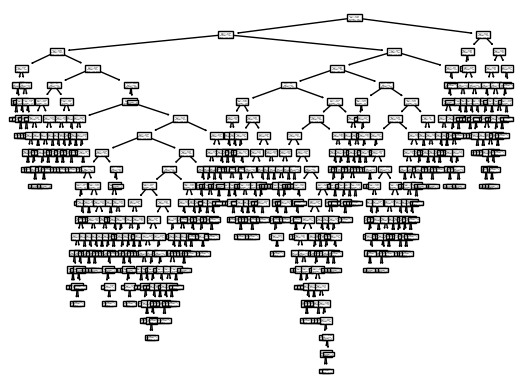

In [54]:
tree.plot_tree(model_tree)

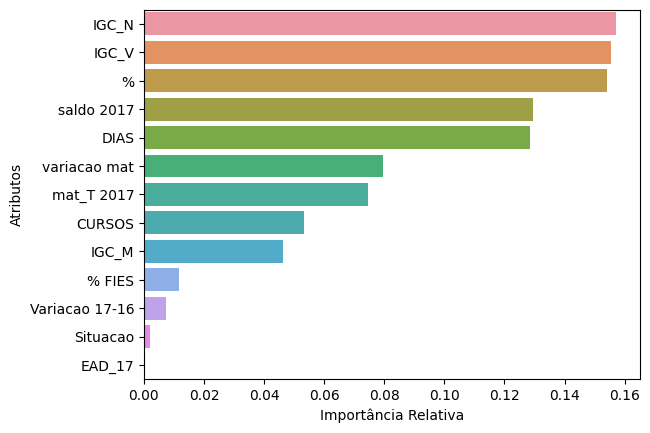

In [55]:
importancias_dos_atributos = pd.Series(model_tree.feature_importances_,index=['Situacao', 'DIAS', '%','IGC_N', 'IGC_M', 'IGC_V', 
              'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 'CURSOS',
              'saldo 2017', 'Variacao 17-16']).sort_values(ascending=False)
importancias_dos_atributos

sns.barplot(x=importancias_dos_atributos, y=importancias_dos_atributos.index)

plt.xlabel('Importância Relativa')
plt.ylabel('Atributos')
#plt.legend()
plt.show()

------------------------------------

## Análises: